In [1]:
library(tidyverse)
library(universalmotif)
#library(MotifDb)
library(cowplot)

# # Assuming 'your_output.meme' is the output MEME file from xstreme
# motifs_from_xstreme <- read_meme('/scratch/jpm73279/comparative_single_cell/07.call.ACRs/06.motif_enrichment/zm_dir/mesophyll/xstreme/combined.meme')

# # If you only want a subset of the motifs, you can subset them. 
# # Here we'll use all of them for demonstration:
#motifs <- convert_motifs(motifs_from_xstreme)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2          ✔ readr     2.1.4     
✔ forcats   1.0.0.9000     ✔ stringr   1.5.0     
✔ ggplot2   3.4.3          ✔ tibble    3.2.1     
✔ lubridate 1.9.2          ✔ tidyr     1.3.0     
✔ purrr     1.0.2          
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp




In [2]:
zm_meso_test <- read_tsv("/scratch/jpm73279/comparative_single_cell/07.call.ACRs/06.motif_enrichment/zm_dir/mesophyll/xstreme/xstreme.tsv")
head(zm_meso_test)

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 30 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (7): RANK, SOURCE, ID, ALT_ID, CONSENSUS, SIM_SOURCE, SIM_MOTIF
dbl (7): SEED_MOTIF, CLUSTER, WIDTH, SITES, SEA_PVALUE, EVALUE, EVALUE_ACC
lgl (1): MOTIF_URL

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


RANK,SEED_MOTIF,CLUSTER,SOURCE,ID,ALT_ID,CONSENSUS,WIDTH,SITES,SEA_PVALUE,EVALUE,EVALUE_ACC,SIM_SOURCE,SIM_MOTIF,MOTIF_URL
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<lgl>
NA,1,1,MEME,AWAWAWAAAWAAAWA,MEME-1,AWAWAWAAAWAAAWA,15,1196,2.72,7.50e-59,1,00.data/conserved_consensus_motifs_Fig2B.meme,MADS_MIKC,NA
NA,1,2,MEME,GRCGRCGRCGRCGVS,MEME-2,GRCGRCGRCGRCGVS,15,596,2.72,7.30e-29,1,00.data/conserved_consensus_motifs_Fig2B.meme,AS2LOB,NA
NA,1,3,STREME,1-CAYGYACGY,STREME-1,CAYGYACGY,9,1785,2.72,6.78e-21,1,00.data/conserved_consensus_motifs_Fig2B.meme,NAC,NA
NA,0,1,STREME,2-AAAAAAAMR,STREME-2,AAAAAAAMR,9,1125,2.72,6.01e-11,1,00.data/conserved_consensus_motifs_Fig2B.meme,C2C2_Dof,NA
NA,1,4,STREME,3-CCACACGCC,STREME-3,CCACACGCC,9,1578,2.72,1.27e-08,1,00.data/conserved_consensus_motifs_Fig2B.meme,CAMTA,NA
NA,1,5,STREME,4-ACGTGACG,STREME-4,ACGTGACG,8,1106,2.72,8.20e-08,1,STREME,4-ACGTGACG,NA


In [3]:
zm_meso_test$SIM_MOTIF

[1] "MADS_MIKC"         "AS2LOB"            "NAC"              
 [4] "C2C2_Dof"          "CAMTA"             "4-ACGTGACG"       
 [7] "5-GCAGCA"          "6-TATATATAT"       "AS2LOB"           
[10] "8-AAMCAAACAAAM"    "BES1"              "NAC"              
[13] "bHLH_TCP"          "12-CACACACACACA"   "13-CRTCCRTCC"     
[16] "ARF"               "15-GACAGGASA"      "BBRBPC"           
[19] "ARF"               "SBP"               "BES1"             
[22] "20-CCCKGCCCYGS"    "21-CTAGCTA"        "22-TAAAATAT"      
[25] "23-TCCAGTCCAGTCCA" "GARP_ARR-B"        "25-VYGCSGCRB"     
[28] NA                  NA                  NA

In [4]:
# quantile(zm_meso_test$EVALUE, na.rm = TRUE)

In [5]:
# filter_motifs <- function(tsv_file, meme_file, species, cell_type) {
  
#   # Step 1: Filter TSV file
#   tsv_data <- read_tsv(tsv_file, show_col_types = FALSE) %>%
#     filter(SIM_SOURCE == "00.data/conserved_consensus_motifs_Fig2B.meme") %>% 
#     mutate(streme_alt_id = str_c(ID,ALT_ID, sep = "-"))

  
#   # Step 2: Read MEME file
#   motifs_list <- read_meme(meme_file)
  
  
#   # Filter the list of universalmotif objects based on the IDs in the TSV
#   filtered_motifs_list <- lapply(motifs_list, function(motif) {
#     if(motif@altname %in% tsv_data$streme_alt_id) {
#       # Add the "species" and "cell_type" to the altname field
#       motif@altname <- paste(motif@altname, species, cell_type, sep = "_")
#       return(motif)
#     } else {
#       return(NULL)
#     }
#   })
    
#   tsv_data <- tsv_data %>% 
#       mutate(ID = paste(ID, species, cell_type, sep = "_"))
    
#   return(list(tsv_data = tsv_data, motifs = filtered_motifs_list))
# }
filter_motifs <- function(tsv_file, meme_file, species, cell_type) {
  
  # Step 1: Filter TSV file
  tsv_data <- read_tsv(tsv_file, show_col_types = FALSE) %>%
    filter(SIM_SOURCE == "00.data/conserved_consensus_motifs_Fig2B.meme") %>% 
    #filter(SOURCE == "MEME") %>% 
    mutate(streme_alt_id = str_c(ID,ALT_ID, sep = "-")) %>% 
    dplyr::filter(EVALUE < .05)
  
  # Step 2: Read MEME file
  motifs_list <- read_meme(meme_file)
  
  filtered_motifs_list <- lapply(motifs_list, function(motif) {
    if(motif@altname %in% tsv_data$streme_alt_id) {
      
        
      motif_family <- filter(tsv_data, streme_alt_id == motif@altname)$SIM_MOTIF
      motif@family <- as.character(motif_family)
      motif@organism <- species
      
      # Add the "species" and "cell_type" to the altname field
      motif@altname <- paste(motif@altname, species, cell_type, sep = "_")

      
      return(motif)
    } else {
      return(NULL)
    }
  })
  
  # Filter out motifs with a homopolymer (e.g., "AAAAA")
  # Extract the consensus sequences from each motif
  consensus_sequences <- sapply(filtered_motifs_list, function(x) if (!is.null(x)) x@consensus else NULL)

  # Search for motifs that have the pattern of five identical nucleotides
  has_homopolymer <- grepl("(A{6,}|T{5,}|C{5,}|G{8,}|TATATA)", consensus_sequences)

  # Exclude the motifs with the homopolymer pattern
  filtered_motifs_list <- filtered_motifs_list[!has_homopolymer]
  
  tsv_data <- tsv_data %>% 
      mutate(ID = paste(ID, species, cell_type, sep = "_"))
    
  return(list(tsv_data = tsv_data, motifs = filtered_motifs_list))
}
## Example usage on single file
# result <- filter_motifs("/scratch/jpm73279/comparative_single_cell/07.call.ACRs/06.motif_enrichment/zm_dir/mesophyll/xstreme/xstreme.tsv", 
# "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/06.motif_enrichment/zm_dir/mesophyll/xstreme/combined.meme", 
#                         "Zm", "mesophyll")
# filtered_tsv <- result$tsv_data
# filtered_motifs <- result$motifs

In [6]:
base_path <- "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/06.motif_enrichment/"

file_list <- list(
  Os = list(
    meme = paste0(base_path, "os_dir/mesophyll/xstreme/combined.meme"),
    tsv = paste0(base_path, "os_dir/mesophyll/xstreme/xstreme.tsv")
  ),
  Zm = list(
    meme = paste0(base_path, "zm_dir/mesophyll/xstreme/combined.meme"),
    tsv = paste0(base_path, "zm_dir/mesophyll/xstreme/xstreme.tsv")
  ),
  Uf = list(
    meme = paste0(base_path, "uf_dir/mesophyll/xstreme/combined.meme"),
    tsv = paste0(base_path, "uf_dir/mesophyll/xstreme/xstreme.tsv")
  ),
  Pm = list(
    meme = paste0(base_path, "pm_dir/mesophyll/xstreme/combined.meme"),
    tsv = paste0(base_path, "pm_dir/mesophyll/xstreme/xstreme.tsv")
  ),
  Sb = list(
    meme = paste0(base_path, "sb_dir/mesophyll/xstreme/combined.meme"),
    tsv = paste0(base_path, "sb_dir/mesophyll/xstreme/xstreme.tsv")
  )
)

# Now, let's apply the filter_motifs function to each species' set of files:

all_filtered_motifs <- list()

for(species in names(file_list)) {
  result <- filter_motifs(file_list[[species]]$tsv, file_list[[species]]$meme, species, "mesophyll")
  all_filtered_motifs[[species]] <- result$motifs
}

# Remove NULL entries from the list of lists
all_filtered_motifs <- lapply(all_filtered_motifs, function(species_motifs) {
  Filter(Negate(is.null), species_motifs)
})

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”


In [7]:
merged_list <- unlist(all_filtered_motifs, recursive = FALSE)

In [8]:
filtered_motifs <- lapply(merged_list, function(motif) {
  motif <- trim_motifs(motif)
  motif <- round_motif(motif)
  motif@name <- motif@altname
  return(motif)
})


In [9]:
# # Generate the motif tree
# tree <- motif_tree(filtered_motifs, layout = "rectangular", linecol = "species")


In [10]:
# Generate the motif tree
tree <- motif_tree(filtered_motifs, layout = "rectangular", linecol = "organism")


Registered S3 method overwritten by 'ggtree':
  method      from 
  identify.gg ggfun



In [11]:
# Extract the order based on the tree
new.order <- tree$data$label[tree$data$isTip]
new.order <- rev(new.order[order(tree$data$y[tree$data$isTip])])


In [12]:
# Extract names or altname from filtered_motifs
motif_names <- sapply(filtered_motifs, function(x) x@name)

# Match the names with the new_order
order_index <- match(new.order, motif_names)

# Reorder filtered_motifs based on the matched index
reordered_motifs <- filtered_motifs[order_index]


In [13]:
#filtered_motifs <- filtered_motifs[new.order]

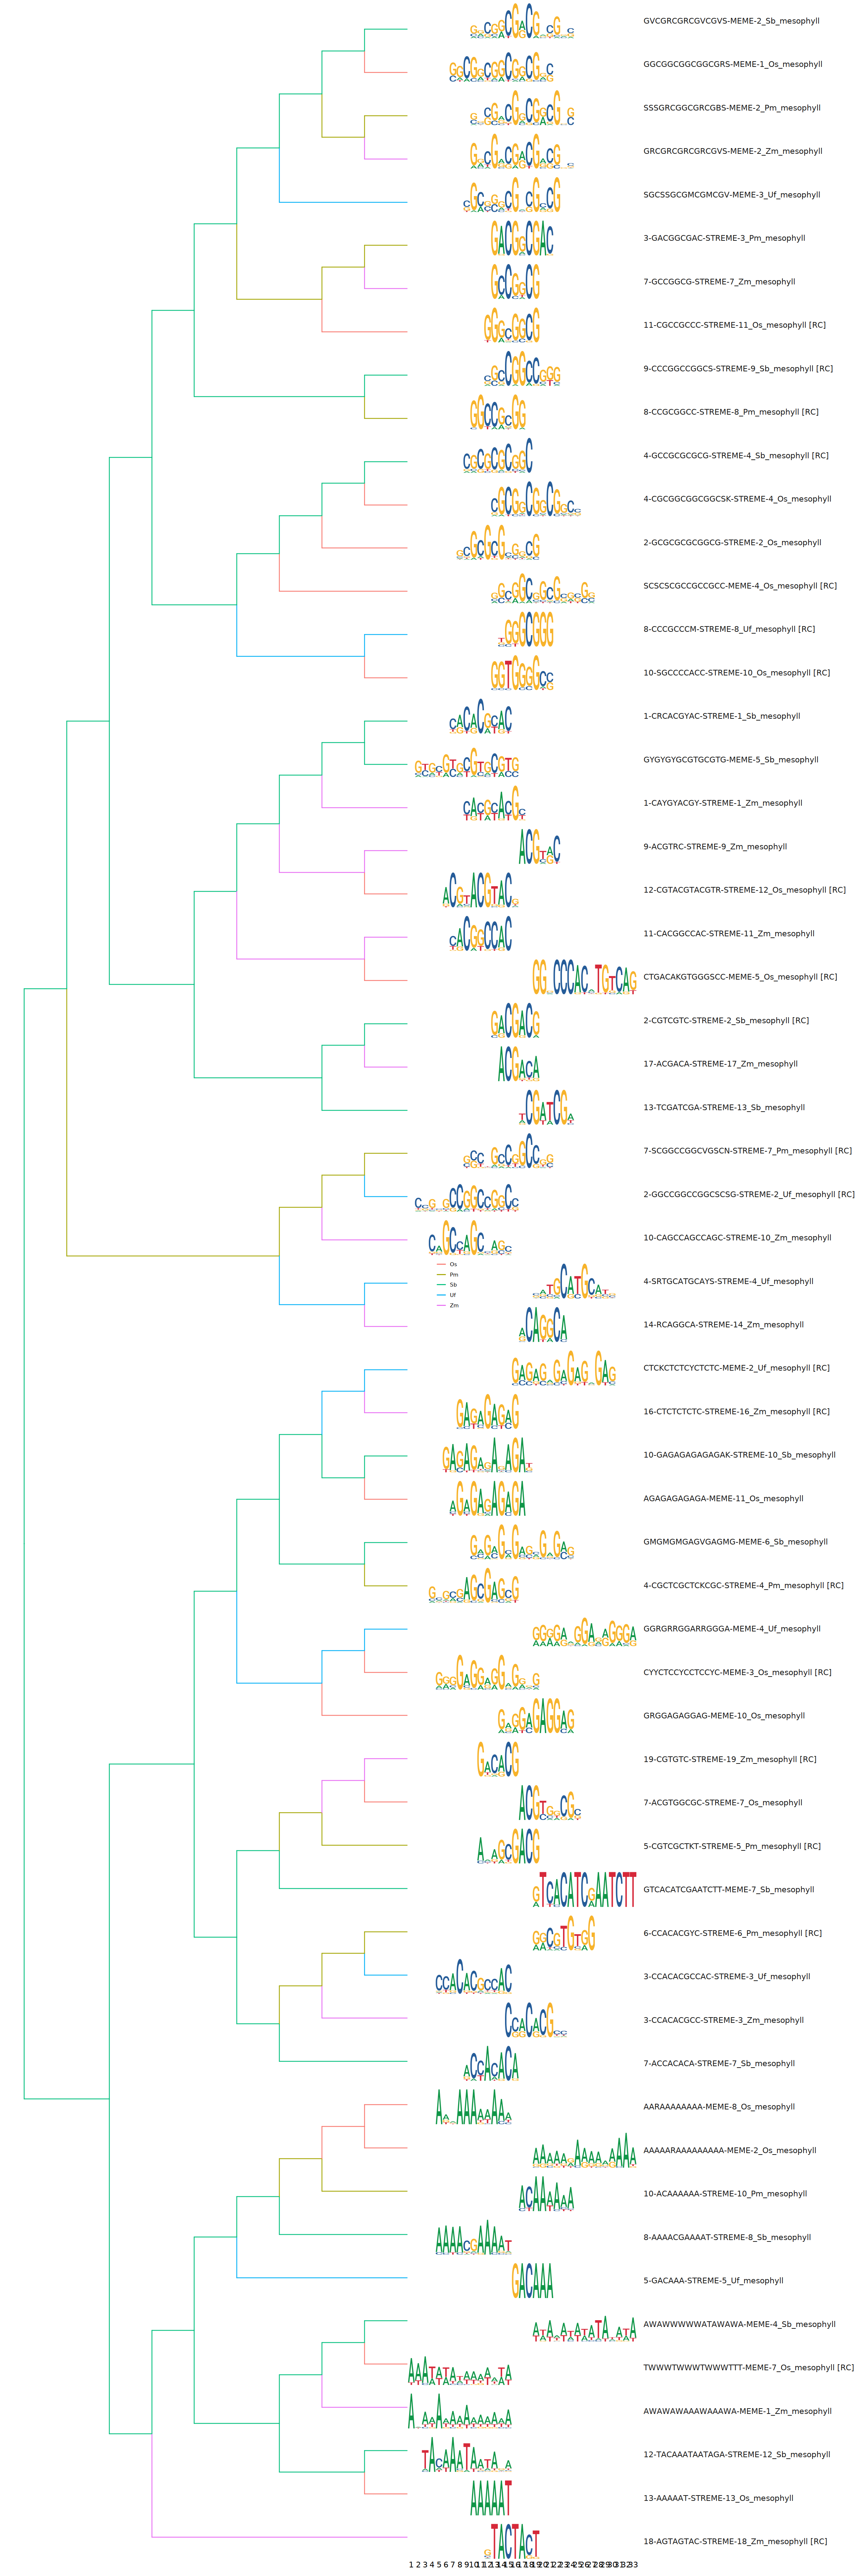

In [14]:
options(repr.plot.width=20, repr.plot.height=60)

# Plot the motifs and the tree side by side
plot_grid(nrow = 1, rel_widths = c(1, -0.15, 1),
          tree + xlab(""), NULL,
          view_motifs(reordered_motifs, names.pos = "right") +
            ylab(element_blank()) +
            theme(
              axis.line.y = element_blank(),
              axis.ticks.y = element_blank(),
              axis.text.y = element_blank(),
              axis.text = element_text(colour = "white")
            )
)

In [15]:
base_path <- "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/06.motif_enrichment/"

file_list <- list(
  Os = list(
    meme = paste0(base_path, "os_dir/bundle_sheath/xstreme/combined.meme"),
    tsv = paste0(base_path, "os_dir/bundle_sheath/xstreme/xstreme.tsv")
  ),
  Zm = list(
    meme = paste0(base_path, "zm_dir/bundle_sheath/xstreme/combined.meme"),
    tsv = paste0(base_path, "zm_dir/bundle_sheath/xstreme/xstreme.tsv")
  ),
  Uf = list(
    meme = paste0(base_path, "uf_dir/bundle_sheath/xstreme/combined.meme"),
    tsv = paste0(base_path, "uf_dir/bundle_sheath/xstreme/xstreme.tsv")
  ),
  Pm = list(
    meme = paste0(base_path, "pm_dir/bundle_sheath/xstreme/combined.meme"),
    tsv = paste0(base_path, "pm_dir/bundle_sheath/xstreme/xstreme.tsv")
  ),
  Sb = list(
    meme = paste0(base_path, "sb_dir/bundle_sheath/xstreme/combined.meme"),
    tsv = paste0(base_path, "sb_dir/bundle_sheath/xstreme/xstreme.tsv")
  )
)

# Now, let's apply the filter_motifs function to each species' set of files:

bs_all_filtered_motifs <- list()

for(species in names(file_list)) {
  result <- filter_motifs(file_list[[species]]$tsv, file_list[[species]]$meme, species, "bundle_sheath")
  bs_all_filtered_motifs[[species]] <- result$motifs
}

# Remove NULL entries from the list of lists
bs_all_filtered_motifs <- lapply(bs_all_filtered_motifs, function(species_motifs) {
  Filter(Negate(is.null), species_motifs)
})

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”


In [16]:
bs_merged_list <- unlist(bs_all_filtered_motifs, recursive = FALSE)

In [17]:
# bs_filtered_motifs <- lapply(bs_merged_list, function(motif) {
#   motif@name <- motif@altname
#   return(motif)
# })


bs_filtered_motifs <- lapply(bs_merged_list, function(motif) {
  motif <- trim_motifs(motif)
  motif <- round_motif(motif)
  motif@name <- motif@altname
  return(motif)
})


In [18]:
umap_cluster_colors <- c("#DEA940","#A2A763","#D6EEBE","#5894D4","#6AAD51","#6C8686","#FFD92F", "#7f2201","#b53310",
                         "#E7673B","#FB9A99","#E31A1C","#FDBF6F","#CAB2D6","#386CB0","#FFFFB3", "#5dead5","#c11577",
                         "#CCCCCC", "#7570B3","#B15928", "#6A3D9A", "#d87c6a", "#0060e8", "#84c5ff", "#ffd460", "#d81397")


# Generate the motif tree
tree_bs <- motif_tree(bs_filtered_motifs, layout = "rectangular", linecol = "organism")


In [19]:
# Extract the order based on the tree
bs_new.order <- tree_bs$data$label[tree_bs$data$isTip]
bs_new.order <- rev(bs_new.order[order(tree_bs$data$y[tree_bs$data$isTip])])


In [20]:
# Extract names or altname from filtered_motifs
bs_motif_names <- sapply(bs_filtered_motifs, function(x) x@name)

# Match the names with the new_order
bs_order_index <- match(bs_new.order, bs_motif_names)

# Reorder filtered_motifs based on the matched index
bs_reordered_motifs <- bs_filtered_motifs[bs_order_index]


In [21]:
#filtered_motifs <- filtered_motifs[new.order]

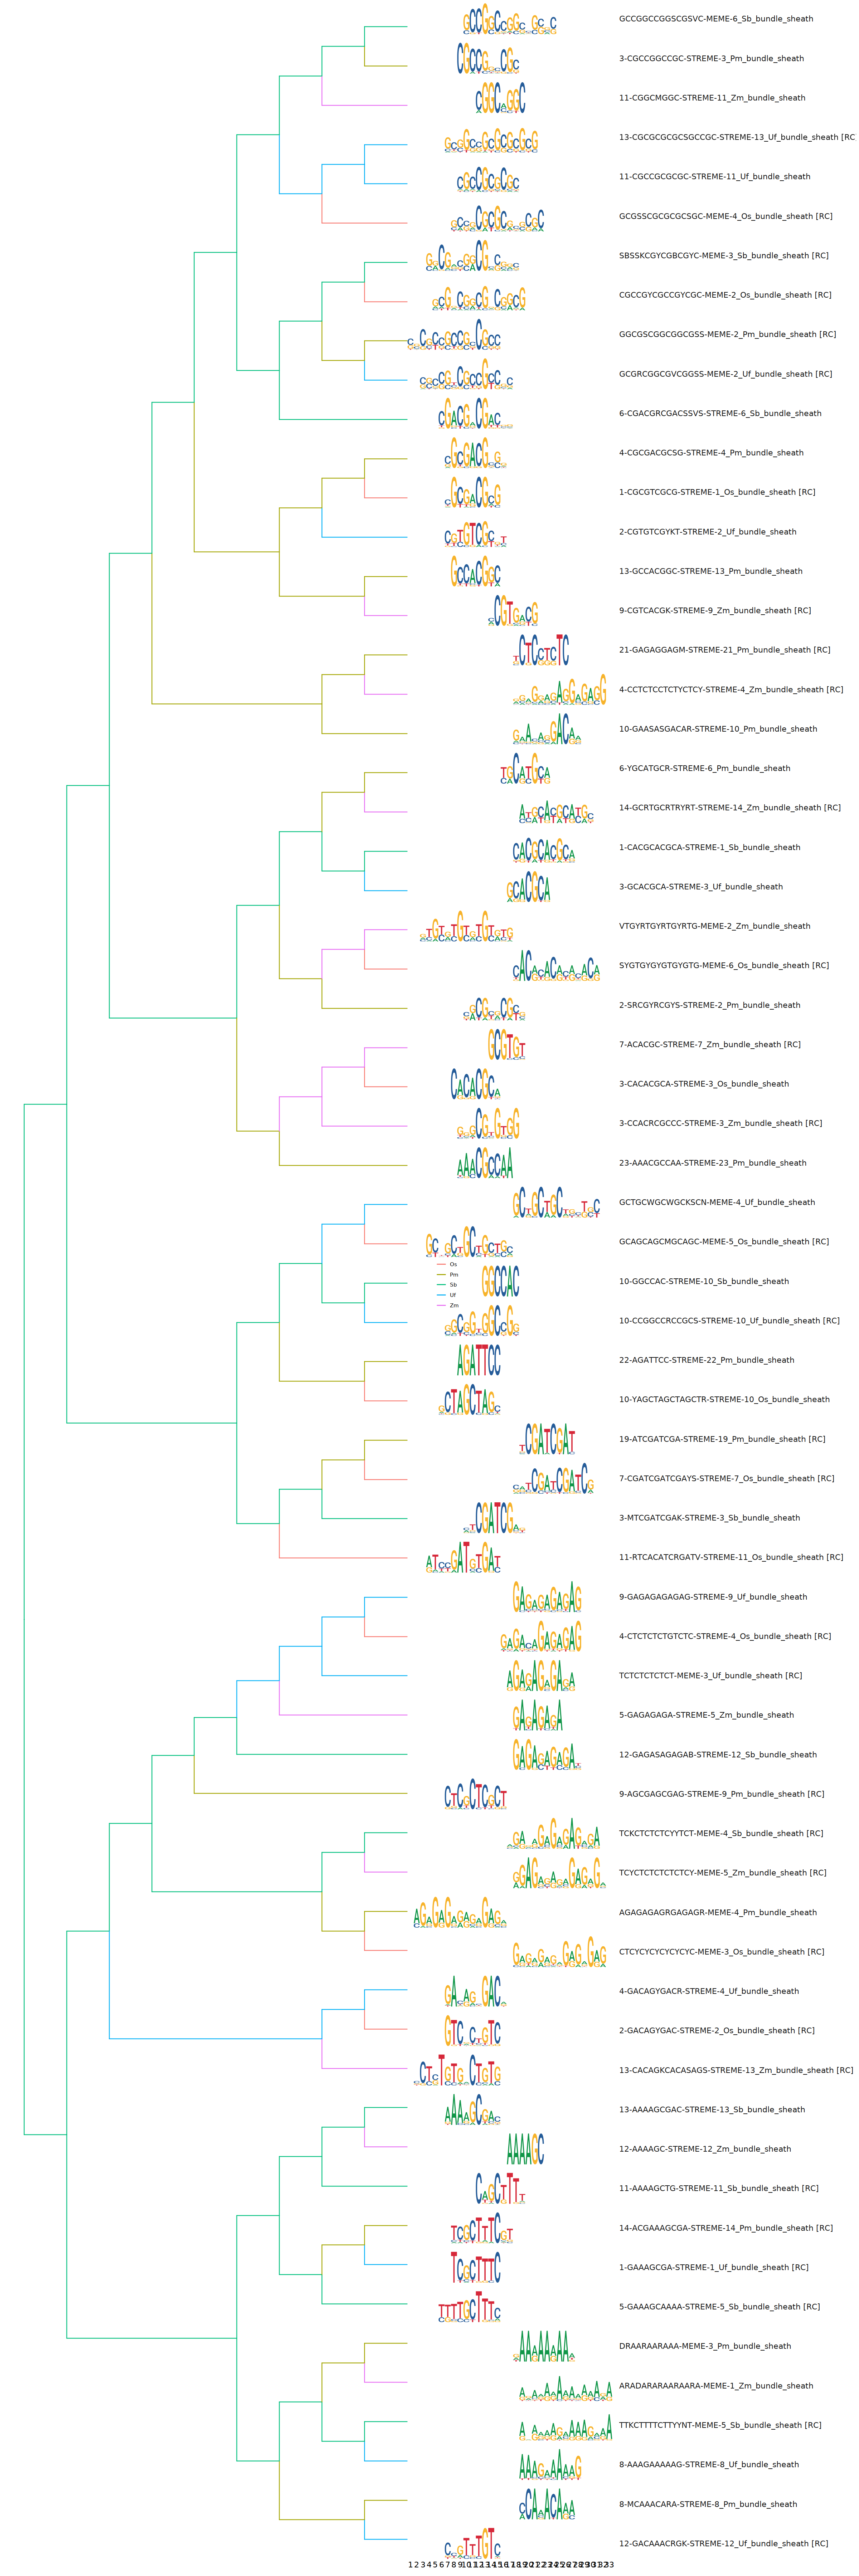

In [22]:
options(repr.plot.width=20, repr.plot.height=60)

# Plot the motifs and the tree side by side
plot_grid(nrow = 1, rel_widths = c(1, -0.15, 1),
          tree_bs + xlab(""), NULL,
          view_motifs(bs_reordered_motifs <- bs_filtered_motifs[bs_order_index]
, names.pos = "right") +
            ylab(element_blank()) +
            theme(
              axis.line.y = element_blank(),
              axis.ticks.y = element_blank(),
              axis.text.y = element_blank(),
              axis.text = element_text(colour = "white")
            )
)

# Fine Tuning Tree Building

In [23]:
library(universalmotif)
library(MotifDb)
library(ggtree)
library(ggplot2)
motifs <- convert_motifs(MotifDb)
motifs <- filter_motifs(motifs, organism = "Athaliana")
motifs <- motifs[sample(seq_along(motifs), 25)]
## Step 1: compare motifs
comparisons <- compare_motifs(motifs, method = "PCC", min.mean.ic = 0,
score.strat = "a.mean")

ERROR: Error in library(MotifDb): there is no package called ‘MotifDb’


In [ ]:
# The current metric, PCC, is a similarity metric
comparisons <- 1 - comparisons
comparisons <- as.dist(comparisons)
# We also want to extract names from the dist object to match annotations
labels <- attr(comparisons, "Labels")
## Step 3: get the comparisons ready for tree-building
# The R package "ape" provides the necessary "as.phylo" function
comparisons <- ape::as.phylo(hclust(comparisons))
## Step 4: incorporate annotation data to colour tree lines
family <- sapply(motifs, function(x) x["family"])
family.unique <- unique(family)
# We need to create a list with an entry for each family; within each entry
# are the names of the motifs belonging to that family
family.annotations <- list()
for (i in seq_along(family.unique)) {
family.annotations <- c(family.annotations,
list(labels[family %in% family.unique[i]]))
}
names(family.annotations) <- family.unique
# Now add the annotation data:
comparisons <- ggtree::groupOTU(comparisons, family.annotations)
## Step 5: draw the tree
tree <- ggtree(comparisons, aes(colour = group), layout = "rectangular") +
theme(legend.position = "bottom", legend.title = element_blank())
## Step 6: add additional annotations
# If we wish, we can additional annotations such as tip labelling and size
# Tip labels:
tree <- tree + geom_tiplab()
# Tip size:
tipsize <- data.frame(label = labels,
icscore = sapply(motifs, function(x) x["icscore"]))
tree <- tree %<+% tipsize + geom_tippoint(aes(size = icscore))